# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-polarizadores-lineales" data-toc-modified-id="Determinación-de-los-parámetros-de-los-polarizadores-lineales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los polarizadores lineales</a></div><div class="lev2 toc-item"><a href="#Cargar-la-intensidad-con-P1-y-P4" data-toc-modified-id="Cargar-la-intensidad-con-P1-y-P4-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cargar la intensidad con P1 y P4</a></div><div class="lev2 toc-item"><a href="#Fitting-data-to-sine" data-toc-modified-id="Fitting-data-to-sine-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fitting data to sine</a></div><div class="lev2 toc-item"><a href="#Calibration-parameters" data-toc-modified-id="Calibration-parameters-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Calibration parameters</a></div><div class="lev1 toc-item"><a href="#Otros-ajustes" data-toc-modified-id="Otros-ajustes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Otros ajustes</a></div><div class="lev2 toc-item"><a href="#Fitting-to-matrices---1:-sencillo" data-toc-modified-id="Fitting-to-matrices---1:-sencillo-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fitting to matrices - 1: sencillo</a></div><div class="lev2 toc-item"><a href="#Ajuste-global:-p0,-p1,-angulo" data-toc-modified-id="Ajuste-global:-p0,-p1,-angulo-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ajuste global: p0, p1, angulo</a></div><div class="lev3 toc-item"><a href="#Verificación" data-toc-modified-id="Verificación-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Verificación</a></div><div class="lev3 toc-item"><a href="#Comparación" data-toc-modified-id="Comparación-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Comparación</a></div><div class="lev3 toc-item"><a href="#Conclusión" data-toc-modified-id="Conclusión-223"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Conclusión</a></div>

# Determinación de los parámetros del divisor de haz usando dos polarizadores

**Autor**: Jesús del Hoyo

**Fecha**:   24/08/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Polarizador 1 LPNIRE100-B (P1).
1. Polarizador 4 LPNIRE100-B (P2), solo en Experimento 2.

We assume that the polarizers may depolarize, with their Mueller matrix as:

\begin{equation}
M_{pol}(\theta=0)=M_{depol}*M_{diat}(\theta=0)=
\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & d & 0 & 0 \\
0 & 0 & d & 0 \\
0 & 0 & 0 & d \\
\end{array}\right] *
\left[\begin{array}{cccc}
P^2_1+P^2_2 & P^2_1-P^2 & 0 & 0 \\
P^2_1-P^2 & P^2_1+P^2_2 & 0 & 0 \\
0 & 0 & 2P_1P_2 & 0 \\
0 & 0 & 0 & 2P_1P_2 \\
\end{array}\right]
\end{equation}

**4th experiment**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R1).
1. Divisor de haz Thorlabs CCM1-BS014/M (BS).
1. Polarizador 1 LPNIRE100-B (P2).

Variables: 
1. 2D, P1 and P2 rotation.
1. 2D, R1 and P2 rotation.

Parameters that can be extracted from fit:
1. Theta 0 of R1.
1. R parameters (moddeled as diattenuator retarder).

**5th experiment**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R1).
1. Divisor de haz Thorlabs CCM1-BS014/M (BS).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R2).
1. Polarizador 1 LPNIRE100-B (P2).

Variables: 
1. 2D, R1 and R2 rotation, both polarizers horizontal.
1. 2D, R1 and R2 rotation, first polarizer horizontal, second polarizer vertical.

Parameters that can be extracted from fit:
1. Theta 0 of R2.
1. Fine tuning of R parameters (moddeled as diattenuator retarder).


In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from __future__ import print_function

import time
import pprint

from numpy import array, matrix, matmul, power, sum, size, zeros
from math import sin, cos, pi, sqrt
from cmath import exp

from phyton_optics import degrees , sp, plt

from scipy import optimize, exp
from scipy.io import loadmat

from polarimeter.utils import plot_experiment_residuals_1D
from polarimeter.polarimeter import (get_polarimeter_parameters, intensity, 
                                    polarimeter_matrices, get_light_parameters)

from phyton_optics.polarization_jones import rotation
from phyton_optics.polarization_stokes import polarizer_linear, rotate_mueller, polarized_light
from polarimeter.utils import dibujar_2d_fitting


from polarimeter.polarimeter import Intensity_Rotating_Elements
import polarimeter.polarimeter as opsys
import phyton_optics.polarization_jones as pj
import phyton_optics.polarization_stokes as ps
import numpy as np
import scipy as sp
import os

## Load data

In [11]:
# Go to the desired folder
#dir = 'calibration'
print(os.getcwd())
#os.chdir(dir)

# Load file, Experiment 4
filename = 'Experimento_4_2018-08-23.npz'
data = np.load(filename)
# Rename variables
angle_e4x = data['angle2x']*degrees
angle_e4y = data['angle2y']*degrees
Imax_e4 = data['intensity_max']
I_e4 = data['intensity2']
Imax = data['intensity_max']

# Load file, Experiment 5a
filename = 'Experimento_5a_2018-08-23.npz'
data = np.load(filename)
# Rename variables
angle_e5ax = data['angle2x']*degrees
angle_e5ay = data['angle2y']*degrees
Imax_e5a = data['intensity_max']
I_e5a = data['intensity2']
# Load file, Experiment 5b
filename = 'Experimento_5b_2018-08-23.npz'
data = np.load(filename)
# Rename variables
angle_e5bx = data['angle2x']*degrees
angle_e5by = data['angle2y']*degrees
Imax_e5b = data['intensity_max']
I_e5b = data['intensity2']

D:\codigo\polarimeter\notebooks\calibration


In [12]:
def depolarizer_diattenuator(p1, p2, d=1, theta=0):
    # Calculate maximum and minimum intensity to use the simple formulas
    IM = (p1**4 + p2**4)/2 
    Im = (p1**2) * (p2**2)
    # Now, calculate the new p1 and p2 as function of d
    p1 = ((IM*(d+1) + Im*(d-1) + 2*sqrt((IM**2 - Im**2)/d))/(2*d))**0.25
    p2 = ((IM*(d+1) + Im*(d-1) - 2*sqrt((IM**2 - Im**2)/d))/(2*d))**0.25
    print(p2)
    # Check that the d value is correct
    if np.isnan(p2):
        raise ValueError('Depolarization parameter inserted is too high.')
    # Create the Stokes matrices of the diattenuator and de depolarizer, and multiply them
    M1 = ps.polarizer_linear(p1, p2)
    M2 = ps.depolarizer(d)
    M = M2*M1
    # Rotate the matrix if necessary
    if theta != 0:
        M = ps.rotate_mueller(M, theta)
    # Output
    return M

def Mueller_Retarder(p1, p2, delta):
    suma = p1**2 + p2**2
    dif = p1**2 - p2**2
    mult = 2*p1*p2
    cd = cos(delta)
    sd = sin(delta)
    M = 0.5 * matrix(array([[suma, dif, 0, 0],
                     [dif, suma, 0, 0],
                     [0, 0, mult*cd, mult*sd],
                     [0, 0, -mult*sd, mult*cd]]))
    return M

## Experiment 4: Rotating both pols

I will try to fit this experiment using the measured diattenuators and with a retarder and source depolarization as parameter.

Use it to fit R1.

In [19]:
# Initial parameters
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp1 = ps.polarizer_linear(p11, p12)
Jp2 = ps.polarizer_linear(p21, p22)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 176.510741175*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
Ec = ps.circular_light()*Imax
print(Ec)
Ej = pj.elliptical_light(parE[0], parE[1], parE[2], parE[3])
Es = ps.Jones_to_Stokes(Ej)
print(Es)


[[3.93997174]
 [0.        ]
 [0.        ]
 [3.93997174]]
[[3.87179984]
 [0.04188456]
 [0.00324262]
 [3.87157192]]


Fit parameters for the quarter waveplate: A = 1.0129292506; B = 1.01994288369; delta = 85.1056515116º; Th0 = 141.301272726º;
Circular polarization degree: 0.0528905074981; 


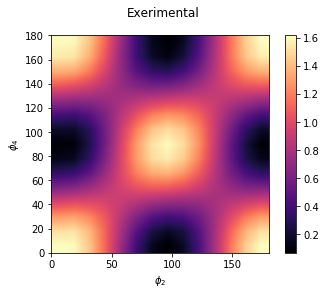

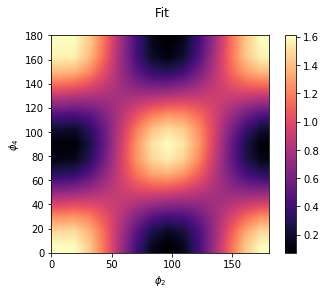

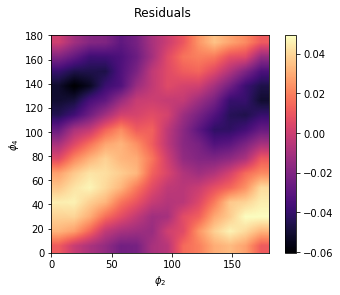

In [24]:
#E0 = 1.38512099075
par0 = [.95, 0.95, 90*degrees, 0, 1]
# Define calculating and distance functions
def model_func2D(par, th1, th2):
    # Jr = ps.diattenuating_retarder_deprecated(par[0], par[1], par[2])    # Funcion está mal
    Jr = Mueller_Retarder(par[0], par[1], par[2])
    J = [Jp1, Jr, Jbs, Jp2]
    th = [th1-th0[0], par[3], -th0[1], th2-th0[2]]
    Es = ps.Jones_to_Stokes(Ej, [1, par[4]])
    #Es = ps.Jones_to_Stokes(Ej, [1, 0.4])
    #I = Intensity_Rotating_Elements(J, th, Imax/2)
    #I = Intensity_Rotating_Elements(J, th, Ec)
    I = Intensity_Rotating_Elements(J, th, Es)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e4x, angle_e4y, I_e4))
# Print results
print('Fit parameters for the quarter waveplate: A = {}; B = {}; delta = {}º; Th0 = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180, (par1[3]/degrees)%180 ))
print('Circular polarization degree: {}; '.format(
        par1[4] ))
I_fitting = model_func2D(par1, angle_e4x, angle_e4y)
residuals = I_e4 - I_fitting
dibujar_2d_fitting(angle_e4x, angle_e4y, I_e4, title='Exerimental')
dibujar_2d_fitting(angle_e4x, angle_e4y, I_fitting, title='Fit')
dibujar_2d_fitting(angle_e4x, angle_e4y, residuals, title='Residuals')

Fit the next experiment.

Fit parameters: Th0 = 16.2437833772º; DTh0 = 39.9863732057º; Pc = -0.251263234416
Fit parameters for the second retarder: A = 0.991817358324; B = 0.984678286954; delta = 81.8489449994º;


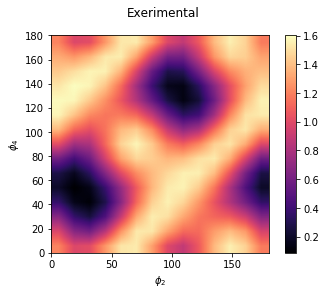

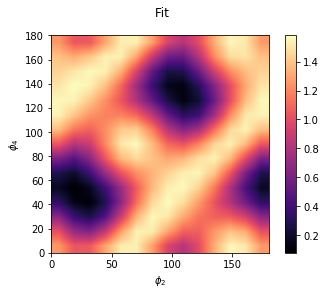

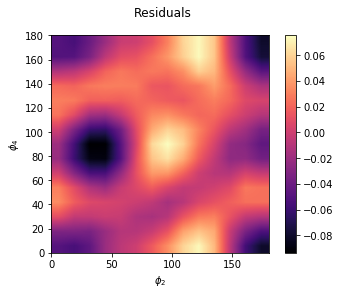

In [36]:
# Initial parameters
#d = 0.9990659
# Initial parameters
d = 0.999075
#d = 1
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp1 = ps.polarizer_linear(p11, p12)
Jp2 = ps.polarizer_linear(p21, p22)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 141.301272726*degrees, 176.510741175*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
pol = [1, 0.0528905074981]
E0 = ps.circular_light()*Imax
Es = ps.Jones_to_Stokes(Ej, pol)
parR = [1.0129292506, 1.01994288369, 85.1056515116*degrees]
Jr = Mueller_Retarder(parR[0], parR[1], parR[2])
#E0 = 1.38512099075
#par0 = [.95, 0.95, 90*degrees, 0, 0, 0]
par0 = [1, 1, 1, 1, 90*degrees, 1]
# Define calculating and distance functions
def model_func2D(par, th1, th2):     
    # Jr = ps.diattenuating_retarder_deprecated(par[0], par[1], par[2])    # Funcion está mal
    Jr2 = Mueller_Retarder(par[2], par[3], par[4])
    th = [-th0[0], th1-par[1], -th0[2], th2-par[0], -th0[3]]
    J = [Jp1, Jr, Jbs, Jr2, Jp2]
    Es = ps.Jones_to_Stokes(Ej, [1, par[5]])
    I = Intensity_Rotating_Elements(J, th, Es)
    #I = Intensity_Rotating_Elements(J, th, E0)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e5ax, angle_e5ay, I_e5a))
# Print results
print('Fit parameters: Th0 = {}º; DTh0 = {}º; Pc = {}'.format(
        (par1[0]/degrees)%180, (par1[1]/degrees)%180 , par1[5] ))
print('Fit parameters for the second retarder: A = {}; B = {}; delta = {}º;'.format(
        par1[2], par1[3], (par1[4]/degrees)%180 ))
#print((par1[4]/degrees)%180)
#par1[3] = 45*degrees
#par1 = [1, 1, pi/2, pi/4]
I_fitting = model_func2D(par1, angle_e5ax, angle_e5ay)
residuals = I_e5a - I_fitting
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_e5a, title='Exerimental')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_fitting, title='Fit')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')

The negative value of Pc means a change in sign in S[3]. The result is a little bit better, and I like having a higher |Pc|.

## Opposite order: Fit experiment 5 and then use the data for experiment 4

Let's do it the other way around.

Fit parameters for the quarter waveplate: A = 0.999709024686; B = 1.00180921378; delta = 82.0959582065º; Th0r1 = 40.0138065404º; Th0r2 = 16.2141589443º;
Fit parameters: Pc = -0.262482672028


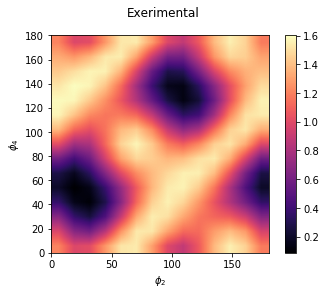

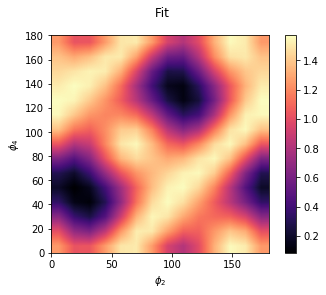

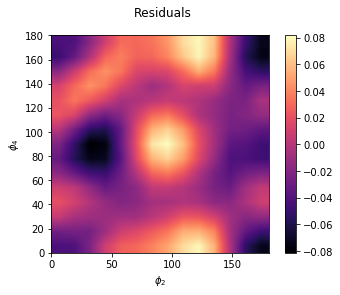

In [37]:
# Initial parameters
d = 0.9990659
#d = 1
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp1 = ps.polarizer_linear(p11, p12)
Jp2 = ps.polarizer_linear(p21, p22)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 176.510741175*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
E0 = ps.circular_light()*Imax
parR = [1.01776671258, 1.02172527164, 85.1080062319*degrees]
#E0 = 1.38512099075
#par0 = [.95, 0.95, 90*degrees, 0, 0, 0]
par0 = [0.95, 0.95, 90*degrees, 0, 0, 1]
# Define calculating and distance functions
def model_func2D(par, th1, th2):     
    # Jr = ps.diattenuating_retarder_deprecated(par[0], par[1], par[2])    # Funcion está mal
    Jr = Mueller_Retarder(par[0], par[1], par[2])
    J = [Jp1, Jr, Jbs, Jr, Jp2]
    th = [-th0[0], th1-par[3], -th0[1], th2-par[4], -th0[2]]
    Es = ps.Jones_to_Stokes(Ej, [1, par[5]])
    I = Intensity_Rotating_Elements(J, th, Es)
    #I = Intensity_Rotating_Elements(J, th, E0)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e5ax, angle_e5ay, I_e5a))
# Print results
print('Fit parameters for the quarter waveplate: A = {}; B = {}; delta = {}º; Th0r1 = {}º; Th0r2 = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180, (par1[3]/degrees)%180, (par1[4]/degrees)%180 ))
print('Fit parameters: Pc = {}'.format(
        par1[5] ))
#print((par1[4]/degrees)%180)
#par1[3] = 45*degrees
#par1 = [1, 1, pi/2, pi/4]
I_fitting = model_func2D(par1, angle_e5ax, angle_e5ay)
residuals = I_e5a - I_fitting
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_e5a, title='Exerimental')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_fitting, title='Fit')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')

Similar result. So let's use all the available data to fit the retarders.

## Use all the data to fit

Here I use all the data available to fit the retarders.

Fit parameters for the quarter waveplate: A = 1.01426091272; B = 1.01829564715; delta = 83.665047277º;
Fit parameters for the angles: Th0r1 = 141.213715787º; Th0r2 = 40.0305866886º Th0r3 = 16.2675499921º;
Fit parameters for Intensity factors: f2 = 0.947011040455; f3 = 0.94549130045;
Fit parameters: Pc = -0.0880894342921


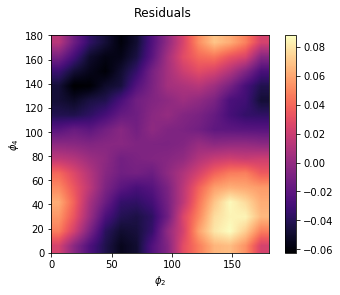

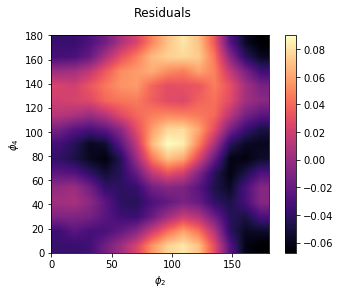

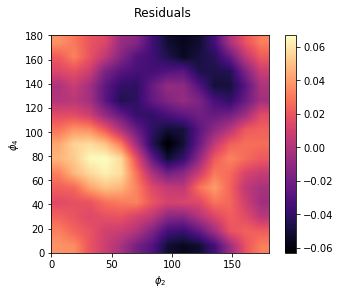

In [38]:
# Initial parameters
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp1 = ps.polarizer_linear(p11, p12)
Jp2 = ps.polarizer_linear(p21, p22)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 176.510741175*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
E0 = ps.circular_light()*Imax
#E0 = 1.38512099075
par0 = [0.95, 0.95, 90*degrees, 0, 0, 0, 1, 1, 1]

# Define calculating and distance functions
def model_func2D(par, th1, th2, th3, th4, th5, th6):    
    Es = ps.Jones_to_Stokes(Ej, [1, par[8]])
    # Experiment 4
    Jr = Mueller_Retarder(par[0], par[1], par[2])
    J = [Jp1, Jr, Jbs, Jp2]
    th = [th1-th0[0], par[3], -th0[1], th2-th0[2]]    
    I1 = Intensity_Rotating_Elements(J, th, Es)
    # Experiment 5a
    J = [Jp1, Jr, Jbs, Jr, Jp2]
    th = [-th0[0], th3-par[4], -th0[1], th4-par[5], -th0[2]]  
    I2 = Intensity_Rotating_Elements(J, th, Es) * par[6]
    # Experiment 5b
    th = [-th0[0], th5-par[4], -th0[1], th6-par[5], -th0[2]-90*degrees]  
    I3 = Intensity_Rotating_Elements(J, th, Es) * par[7]    
    return [I1, I2, I3]

def err_func2D(par, th1, th2, th3, th4, th5, th6, y): 
    I = model_func2D(par, th1, th2, th3, th4, th5, th6)
    dI1 = I[0] - y[0]
    dI2 = I[1] - y[1]
    dI3 = I[2] - y[2]
    return np.concatenate((dI1.flatten(), dI2.flatten(), dI3.flatten()))

# Optimize
y = [I_e4, I_e5a, I_e5b]
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e4x, angle_e4y, angle_e5ax, angle_e5ay, angle_e5bx, angle_e5by, y))
# Print results
print('Fit parameters for the quarter waveplate: A = {}; B = {}; delta = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180))
print('Fit parameters for the angles: Th0r1 = {}º; Th0r2 = {}º Th0r3 = {}º;'.format(
       (par1[3]/degrees)%180, (par1[4]/degrees)%180, (par1[5]/degrees)%180 ))
print('Fit parameters for Intensity factors: f2 = {}; f3 = {};'.format(
        par1[6], par1[7] ))
print('Fit parameters: Pc = {}'.format(
        par1[8] ))
I_fitting = model_func2D(par1, angle_e4x, angle_e4y, angle_e5ax, angle_e5ay, angle_e5bx, angle_e5by)
residuals = I_e4 - I_fitting[0]
dibujar_2d_fitting(angle_e4x, angle_e4y, residuals, title='Residuals')
residuals = I_e5a - I_fitting[1]
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')
residuals = I_e5b - I_fitting[2]
dibujar_2d_fitting(angle_e5bx, angle_e5by, residuals, title='Residuals')

Just for comparison, I will repeat that experiment in Jones using polarizers as diattenuator retarders.

Fit parameters for the quarter waveplate: A = 1.01413014621; B = 1.0180988793; delta = 83.6530483541º;
Fit parameters for the angles: Th0r1 = 140.33256052º; Th0r2 = 41.3072185611º Th0r3 = 16.5954876323º;
Fit parameters for Intensity factors: f2 = 0.944769089475; f3 = 0.950069116266;
Other fit parameters: DeltaP = 65.2600597824º; Pc = 0.212643543362;


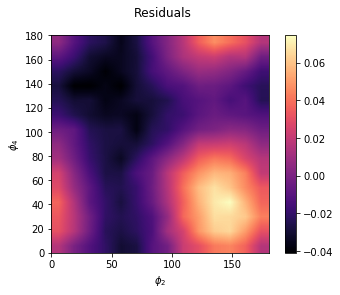

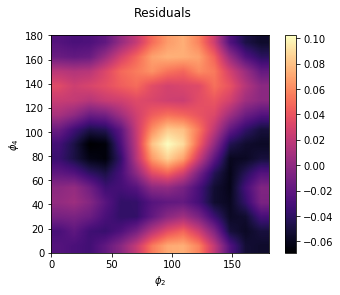

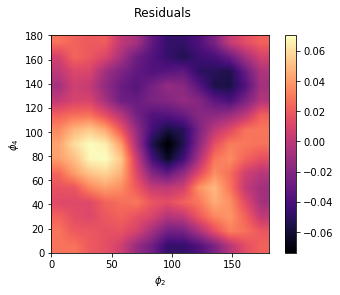

In [44]:
# Initial parameters
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp2 = ps.polarizer_linear(p21, p22)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 176.510741175*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
E0 = ps.circular_light()*Imax
#E0 = 1.38512099075
par0 = [0.95, 0.95, 90*degrees, 0, 0, 0, 1, 1, 1, 0]

# Define calculating and distance functions
def model_func2D(par, th1, th2, th3, th4, th5, th6):    
    Es = ps.Jones_to_Stokes(Ej, [1, par[8]])
    Jp1 = Mueller_Retarder(p11, p12, par[9])
    # Experiment 4
    Jr = Mueller_Retarder(par[0], par[1], par[2])
    J = [Jp1, Jr, Jbs, Jp2]
    th = [th1-th0[0], par[3], -th0[1], th2-th0[2]]    
    I1 = Intensity_Rotating_Elements(J, th, Es)
    # Experiment 5a
    J = [Jp1, Jr, Jbs, Jr, Jp2]
    th = [-th0[0], th3-par[4], -th0[1], th4-par[5], -th0[2]]  
    I2 = Intensity_Rotating_Elements(J, th, Es) * par[6]
    # Experiment 5b
    th = [-th0[0], th5-par[4], -th0[1], th6-par[5], -th0[2]-90*degrees]  
    I3 = Intensity_Rotating_Elements(J, th, Es) * par[7]    
    return [I1, I2, I3]

def err_func2D(par, th1, th2, th3, th4, th5, th6, y): 
    I = model_func2D(par, th1, th2, th3, th4, th5, th6)
    dI1 = I[0] - y[0]
    dI2 = I[1] - y[1]
    dI3 = I[2] - y[2]
    return np.concatenate((dI1.flatten(), dI2.flatten(), dI3.flatten()))


# Optimize
y = [I_e4, I_e5a, I_e5b]
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e4x, angle_e4y, angle_e5ax, angle_e5ay, angle_e5bx, angle_e5by, y))
# Print results
print('Fit parameters for the quarter waveplate: A = {}; B = {}; delta = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180))
print('Fit parameters for the angles: Th0r1 = {}º; Th0r2 = {}º Th0r3 = {}º;'.format(
       (par1[3]/degrees)%180, (par1[4]/degrees)%180, (par1[5]/degrees)%180 ))
print('Fit parameters for Intensity factors: f2 = {}; f3 = {};'.format(
        par1[6], par1[7] ))
print('Other fit parameters: DeltaP = {}º; Pc = {};'.format(
       (par1[9]/degrees)%180, par1[8] ))
I_fitting = model_func2D(par1, angle_e4x, angle_e4y, angle_e5ax, angle_e5ay, angle_e5bx, angle_e5by)
residuals = I_e4 - I_fitting[0]
dibujar_2d_fitting(angle_e4x, angle_e4y, residuals, title='Residuals')
residuals = I_e5a - I_fitting[1]
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')
residuals = I_e5b - I_fitting[2]
dibujar_2d_fitting(angle_e5bx, angle_e5by, residuals, title='Residuals')

Result very similar to the previous one. Try again using different retarders.

Fit parameters for the first quarter waveplate: A = 1.01183615071; B = 1.02016987992; delta = 84.0919779351º;
Fit parameters for the second quarter waveplate: A = 0.991596189857; B = 0.98804285676; delta = 82.6959587998º;
Fit parameters for the angles: Th0r1 = 141.215075975º; Th0r2 = 40.0259653774º Th0r3 = 16.2793183868º;
Fit parameters for Intensity factors: f2 = 0.997370817692; f3 = 1.0;
Fit parameters: Pc = -0.0881509116831


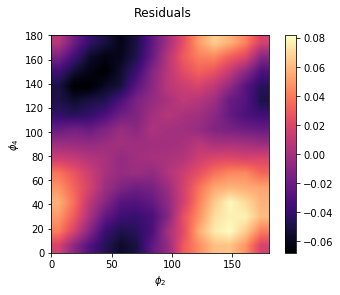

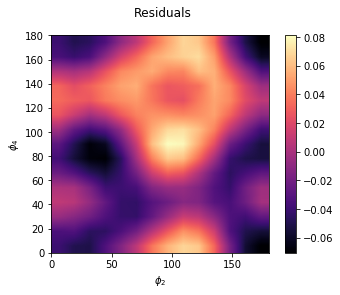

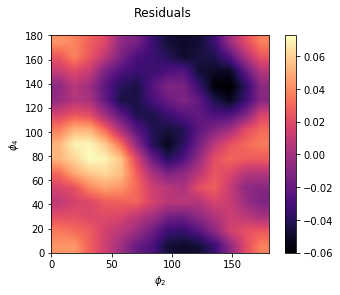

In [49]:
# Initial parameters
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp1 = ps.polarizer_linear(p11, p12)
Jp2 = ps.polarizer_linear(p21, p22)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 176.510741175*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
E0 = ps.circular_light()*Imax
#E0 = 1.38512099075
par0 = [0.95, 0.95, 90*degrees, 0, 0, 0, 1, 1, 1, 0.95, 0.95, 90*degrees]

# Define calculating and distance functions
def model_func2D(par, th1, th2, th3, th4, th5, th6):    
    Es = ps.Jones_to_Stokes(Ej, [1, par[8]])
    # Experiment 4
    Jr1 = Mueller_Retarder(par[0], par[1], par[2])
    J = [Jp1, Jr1, Jbs, Jp2]
    th = [th1-th0[0], par[3], -th0[1], th2-th0[2]]    
    I1 = Intensity_Rotating_Elements(J, th, Es)
    # Experiment 5a
    Jr2 = Mueller_Retarder(par[9], par[10], par[11])
    J = [Jp1, Jr1, Jbs, Jr2, Jp2]
    th = [-th0[0], th3-par[4], -th0[1], th4-par[5], -th0[2]]  
    I2 = Intensity_Rotating_Elements(J, th, Es) * par[6]
    # Experiment 5b
    th = [-th0[0], th5-par[4], -th0[1], th6-par[5], -th0[2]-90*degrees]  
    I3 = Intensity_Rotating_Elements(J, th, Es) #* par[7]   
    return [I1, I2, I3]

def err_func2D(par, th1, th2, th3, th4, th5, th6, y): 
    I = model_func2D(par, th1, th2, th3, th4, th5, th6)
    dI1 = I[0] - y[0]
    dI2 = I[1] - y[1]
    dI3 = I[2] - y[2]
    return np.concatenate((dI1.flatten(), dI2.flatten(), dI3.flatten()))

# Optimize
y = [I_e4, I_e5a, I_e5b]
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e4x, angle_e4y, angle_e5ax, angle_e5ay, angle_e5bx, angle_e5by, y))
# Print results
print('Fit parameters for the first quarter waveplate: A = {}; B = {}; delta = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180))
print('Fit parameters for the second quarter waveplate: A = {}; B = {}; delta = {}º;'.format(
        par1[9], par1[10], (par1[11]/degrees)%180))
print('Fit parameters for the angles: Th0r1 = {}º; Th0r2 = {}º Th0r3 = {}º;'.format(
       (par1[3]/degrees)%180, (par1[4]/degrees)%180, (par1[5]/degrees)%180 ))
print('Fit parameters for Intensity factors: f2 = {}; f3 = {};'.format(
        par1[6], par1[7] ))
print('Fit parameters: Pc = {}'.format(
        par1[8] ))
I_fitting = model_func2D(par1, angle_e4x, angle_e4y, angle_e5ax, angle_e5ay, angle_e5bx, angle_e5by)
residuals = I_e4 - I_fitting[0]
dibujar_2d_fitting(angle_e4x, angle_e4y, residuals, title='Residuals')
residuals = I_e5a - I_fitting[1]
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')
residuals = I_e5b - I_fitting[2]
dibujar_2d_fitting(angle_e5bx, angle_e5by, residuals, title='Residuals')

Essentially the same result. Last thing, use P1 also as diattenuator retarder.

Fit parameters for the first quarter waveplate: A = 1.01180294033; B = 1.01989892928; delta = 84.0376822489º;
Fit parameters for the second quarter waveplate: A = 0.993559284697; B = 0.990213072332; delta = 82.783898962º;
Fit parameters for the angles: Th0r1 = 140.345376281º; Th0r2 = 41.2806553609º Th0r3 = 16.598177882º;
Fit parameters for Intensity factors: f2 = 0.990694571354; f3 = 1.0;
Fit parameters: Pc = 0.210171137253; DeltaP = 64.9891811405º;


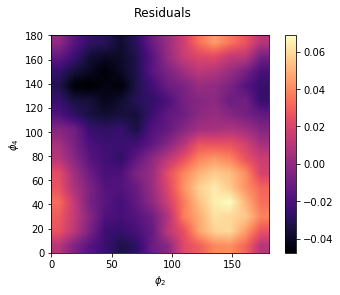

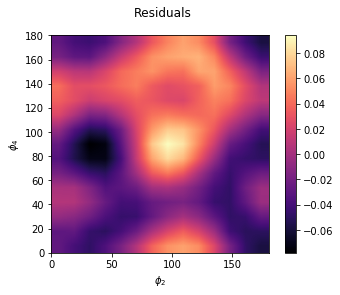

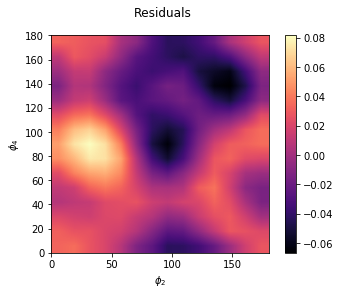

In [50]:
# Initial parameters
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp1 = ps.polarizer_linear(p11, p12)
Jp2 = ps.polarizer_linear(p21, p22)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 176.510741175*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
E0 = ps.circular_light()*Imax
#E0 = 1.38512099075
par0 = [0.95, 0.95, 90*degrees, 0, 0, 0, 1, 1, 1, 0.95, 0.95, 90*degrees, 0]

# Define calculating and distance functions
def model_func2D(par, th1, th2, th3, th4, th5, th6):    
    Es = ps.Jones_to_Stokes(Ej, [1, par[8]])
    Jp1 = Mueller_Retarder(p11, p12, par[12])
    # Experiment 4
    Jr1 = Mueller_Retarder(par[0], par[1], par[2])
    J = [Jp1, Jr1, Jbs, Jp2]
    th = [th1-th0[0], par[3], -th0[1], th2-th0[2]]    
    I1 = Intensity_Rotating_Elements(J, th, Es)
    # Experiment 5a
    Jr2 = Mueller_Retarder(par[9], par[10], par[11])
    J = [Jp1, Jr1, Jbs, Jr2, Jp2]
    th = [-th0[0], th3-par[4], -th0[1], th4-par[5], -th0[2]]  
    I2 = Intensity_Rotating_Elements(J, th, Es) * par[6]
    # Experiment 5b
    th = [-th0[0], th5-par[4], -th0[1], th6-par[5], -th0[2]-90*degrees]  
    I3 = Intensity_Rotating_Elements(J, th, Es) #* par[7]    
    return [I1, I2, I3]

def err_func2D(par, th1, th2, th3, th4, th5, th6, y): 
    I = model_func2D(par, th1, th2, th3, th4, th5, th6)
    dI1 = I[0] - y[0]
    dI2 = I[1] - y[1]
    dI3 = I[2] - y[2]
    return np.concatenate((dI1.flatten(), dI2.flatten(), dI3.flatten()))

# Optimize
y = [I_e4, I_e5a, I_e5b]
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e4x, angle_e4y, angle_e5ax, angle_e5ay, angle_e5bx, angle_e5by, y))
# Print results
print('Fit parameters for the first quarter waveplate: A = {}; B = {}; delta = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180))
print('Fit parameters for the second quarter waveplate: A = {}; B = {}; delta = {}º;'.format(
        par1[9], par1[10], (par1[11]/degrees)%180))
print('Fit parameters for the angles: Th0r1 = {}º; Th0r2 = {}º Th0r3 = {}º;'.format(
       (par1[3]/degrees)%180, (par1[4]/degrees)%180, (par1[5]/degrees)%180 ))
print('Fit parameters for Intensity factors: f2 = {}; f3 = {};'.format(
        par1[6], par1[7] ))
print('Fit parameters: Pc = {}; DeltaP = {}º;'.format(
        par1[8], (par1[12]/degrees)%180 ))
I_fitting = model_func2D(par1, angle_e4x, angle_e4y, angle_e5ax, angle_e5ay, angle_e5bx, angle_e5by)
residuals = I_e4 - I_fitting[0]
dibujar_2d_fitting(angle_e4x, angle_e4y, residuals, title='Residuals')
residuals = I_e5a - I_fitting[1]
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')
residuals = I_e5b - I_fitting[2]
dibujar_2d_fitting(angle_e5bx, angle_e5by, residuals, title='Residuals')

Just slightly better. The error still has structure, so probably we are missing something here.

## Conclusion

So we can use the depolarization model to have the best results possible. The parameters for the different ellements are:

** Illumination**

1. Axes: 1.3851 and 1.3976 (almost equal).
1. Delay: 90.351º (almost 90º).
1. Tilt: 104.967º.
4. Depolarization factor: unknown.

Es = [[3.87179984], [0.04188456], [0.00324262], [3.87157192 * Pc]]
|Pc| <~ 0.2 (0.2102 in the last fit)

** First polarizer (P1)**

1. Axes: 0.9879 and 0.1460 (extintion ratio ~45:1).
1. Tilt: 125.992º.
1. Probable delay: 40-70º (64.99º in the last fit).
1. Depolarization factor: unknown.

(p11, p12, R1) = (0.987890699132, 0.146027198644, 64.9891811405*degrees)

Jp1 = Mueller_Retarder(p11, p12, R1)

** First retarder (R1) **

1. Axes: 1.0118 and 1.0199 (almost equal. >1 due to laser instability).
2. Delay: 84.04º (close to 90º).
3. Tilt: 39.932º.
4. Depolarization factor: unknown.

parR1 = [1.01180294033, 1.01989892928, 84.0376822489*degrees]

Jr1 = Mueller_Retarder(parR1[0], parR1[1], parR1[2])

** Beam Splitter (BS)**

1. Axes: 0.9257 and 0.9372 (almost equal, but maybe too high)
1. Depolarization factor: unknown.
1. Tilt: 176.511º.

Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)

** Second retarder (R2) **

1. Axes: 0.9936 and 0.9902 (almost equal).
2. Delay: 82.78º (close to 90º).
3. Tilt: 16.287º.
4. Depolarization factor: unknown.

parR2 = [0.993559284697, 0.990213072332, 82.783898962*degrees]

Jr2 = Mueller_Retarder(parR2[0], parR2[1], parR2[2])

** Second polarizer (P2)**

1. Axes: 0.9789 and 0.1396 (extintion ratio ~50:1).
1. Depolarization factor: unknown.
1. Tilt: 135.633º.

(p21, p22) = (0.978894122499, 0.139589903047)

Jp2 = ps.polarizer_linear(p21, p22)
